**Prática 3 – Validação Cruzada e Métricas De Avaliação**

**Aluno: Jorge Aliomar Trocoli Abdon Dantas**

**Objetivo(s):**

Nesta prática, você irá utilizar a função cross_validate da biblioteca scikit-learn para estimar o desempenho de diferentes algoritmos de classificação através de validação cruzada. A atividade propõe a comparação entre os resultados obtidos com validação cruzada e com uma simples divisão entre treino e teste.

Você você estiver com dúvidas em relação ao funcionamento básico de Python, assista os vídeos:
- https://didatica.tech/curso-de-python-online-para-iniciantes/
- https://www.youtube.com/watch?v=oUrBHiT-lzo

In [ ]:
#Montar drive para leitura das Bases de Dados
#from google.colab import drive

#drive.mount('/gdrive')
#%cd /gdrive/MyDrive/2025-1_PraticasIC/Pratica02

In [ ]:
#Importando Bibliotecas Pandas
import pandas as pd

In [ ]:
#Carregando Base de dados
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [ ]:
# Visualizando os dados de treino
df_train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2

In [ ]:
# Visualizando os dados de teste
df_test

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.

In [ ]:
# Separar atributos e classe
X_train = df_train.drop(columns=["ID_code", "target"])  #remove as colunas ID_code e target
y_train = df_train["target"]                            #iremos tentar prever a coluna target

In [ ]:
#Removendo o atributo `ID_code`, porque essa coluna não trará informação para a classificação
X_test = df_test.drop(columns=["ID_code"])
X_test

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,0.8804,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,8.8336,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,0.3695,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,

# SELECIONANDO MELHOR CLASSIFICADOR USANDO CROSS_VALIDATE - Não Ajustado

In [ ]:
#Importanto as Bibliotecas dos classificadores
from sklearn.tree         import DecisionTreeClassifier # Árvore de Decisão
from sklearn.naive_bayes  import GaussianNB             # Naive Bayes
from sklearn.neighbors    import KNeighborsClassifier   # KNN
from sklearn.svm          import SVC                    # SVM

In [ ]:
#Lista dos Classificadores
classifiers =[#('Árvore de Decisão', DecisionTreeClassifier(random_state=42)),
              #('Naive Bayes', GaussianNB()),
              #('KNN', KNeighborsClassifier()),
              ('SVM', SVC(random_state=42))
              ]

In [ ]:
from sklearn.model_selection import cross_validate

Resultado=[]
for nome, classifier in classifiers:
  scores = cross_validate(classifier, X_train, y_train, scoring=["f1_macro", 'precision'], cv = 10)
  scores_f1_macro  = scores["test_f1_macro"].mean()
  scores_precision = scores["test_precision"].mean()
  Resultado.append({'Classificador': nome,
                    'f1_macro': scores_f1_macro,
                    'precision': scores_precision})

C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\User

In [ ]:
Resultado

[{'Classificador': 'SVM',
  'f1_macro': np.float64(0.47365038745756116),
  'precision': np.float64(0.2)}]

#TREINAMENTO E PREDIÇÃO - Árvore de Decisão

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Normalização
# Para o classificador Árvore de Decisão a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = DecisionTreeClassifier(random_state=42,max_depth=10)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.5186384641213834)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_ArvoreDecisao_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Normalização
# Para o classificador Árvore de Decisão a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
#Hiperparâmetro ajustado = max_depth = 30
classifier = DecisionTreeClassifier(random_state=42,max_depth=30)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


DecisionTreeClassifier(max_depth=30, random_state=42)

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.561235171953764)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_ArvoreDecisao_Ajustado_F1Score.csv", index=False)

#TREINAMENTO E PREDIÇÃO - Naive Bayes

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Normalização
# Para o classificador Naive Bayes a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = GaussianNB()

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


GaussianNB()

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.7226957194969486)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_NaiveBayes_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Normalização
# Para o classificador Naive Bayes a Normalização não faz diferença

# Importanto Biblioteca do Normalizador Padrão
#from sklearn.preprocessing   import StandardScaler;

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
#Hiperparâmetro ajustado: var_smoothing=1e-7
classifier = GaussianNB(var_smoothing=1e-7)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


GaussianNB(var_smoothing=1e-07)

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.7220963946169634)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_NaiveBayes_Ajustado_F1Score.csv", index=False)

#TREINAMENTO E PREDIÇÃO - kNN

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = KNeighborsClassifier()

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


KNeighborsClassifier()

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.47446511562257704)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_kNN_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = KNeighborsClassifier(n_neighbors = 5,        #Número de Vizinhos
                                  weights = "distance",   #Peso/Ponderação dado pela distância dos vizinhos
                                  metric='euclidean')     #Distância euclidiana

In [ ]:
  #Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


KNeighborsClassifier(metric='euclidean', weights='distance')

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.47446511562257704)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_kNN_Ajustado_F1Score.csv", index=False)

#TREINAMENTO E PREDIÇÃO - SVM

##NÃO AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.svm import SVC

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = SVC(random_state=42)

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


SVC(random_state=42)

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.6559195158592732)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,1
...,...,...
199995,test_199995,1
199996,test_199996,1
199997,test_199997,1
199998,test_199998,1


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_SVM_NãoAjustado_F1Score.csv", index=False)

##AJUSTADO - F1 Macro

In [ ]:
#Importando o Classificador
from sklearn.svm import SVC

In [ ]:
# Normalização
# Para o classificador kNN a Normalização faz diferença

# Importanto Biblioteca do Normalizador Padrão
from sklearn.preprocessing   import StandardScaler;

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)

In [ ]:
#Importando biblioteca train_test_split
from sklearn.model_selection import train_test_split; # train_test_split do sklearn

# Divisão treino/teste
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train_Scaled, y_train, test_size = 0.3, random_state = 42)

In [ ]:
#Instanciamento do classificador
classifier = SVC(random_state=42,   #seed randômica
                 C =3.0,            #sensibilidade da margem
                 degree = 3,        #grau do polinômio
                 kernel = 'poly')   #tipo de ajuste

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)


SVC(C=3.0, kernel='poly', random_state=42)

In [ ]:
#Predição do Modelo Local
y_pred_local = classifier.predict(X_test_local)

In [ ]:
#Determinação do F1 Score Macro

#Importando Biblioteca de Métricas - F1 Score Macro
from sklearn.metrics import f1_score

#Calculo do accuracy_score
f1_sc = f1_score(y_test_local,y_pred_local, average = 'macro')
f1_sc

np.float64(0.590127676689799)

In [ ]:
#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test)

C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

In [ ]:
#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [ ]:
#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_SVM_Ajustado_F1Score.csv", index=False)

# SELECIONANDO MELHOR CLASSIFICADOR USANDO CROSS_VALIDATE - Ajustado

In [ ]:
#Lista dos Classificadores
classifiers =[#('Árvore de Decisão', DecisionTreeClassifier(random_state=42, max_depth= 30)),
              ('Naive Bayes', GaussianNB(var_smoothing=1e-7)),
              #('KNN', KNeighborsClassifier(n_neighbors = 5,        #Número de Vizinhos
              #                              weights = "distance",  #Peso/Ponderação dado pela distância dos vizinhos
              #                              metric='euclidean')),  #Distância euclidiana
              #('SVM', SVC(random_state=42,     #seed randômica
              #              C =3.0,            #sensibilidade da margem
              #              degree = 3,        #grau do polinômio
              #              kernel = 'poly',   #tipo de ajuste
              #              max_iter = 1000))
              ]

In [ ]:
from sklearn.model_selection import cross_validate

Resultado=[]
for nome, classifier in classifiers:
    if nome in ['KNN', 'SVM']:
        fracao_dataFrame = df_train.sample(frac=0.2, random_state=42)  # Seleciona 20% aleatório do DataFrame
        X_train_frac = fracao_dataFrame.drop(columns=["ID_code", "target"])  #Separar atributos e remove as colunas ID_code e target
        y_train_frac = fracao_dataFrame["target"]                            #Separar clases e iremos tentar prever a coluna target
        scores = cross_validate(classifier, X_train_frac, y_train_frac, scoring=["f1_macro"], cv = 10)
    else:
        scores = cross_validate(classifier, X_train, y_train, scoring=["f1_macro"], cv = 10)

    scores_f1_macro  = scores["test_f1_macro"].mean()
    Resultado.append({'Classificador': nome,
                    'f1_macro': scores_f1_macro
                    })

In [ ]:
Resultado

[{'Classificador': 'Naive Bayes', 'f1_macro': np.float64(0.7191325333861153)}]

In [ ]:
#Treinamento do Classificador
classifier.fit(X_train_local, y_train_local)

#Predição do Modelo com os dados de Teste Global
predictions = classifier.predict(X_test.values)

#Geração do Data Frame das predições com o Teste Global
df_test["target"] = predictions

#Exibição do Data Frame que será enviado para o Kaggle
df_test[["ID_code","target"]]

#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test[["ID_code","target"]].to_csv("solucao-2025_NaiveBayes_Ajustado+CrosValidade_F1Score.csv", index=False)


#RESULTADOS

Após a realização das simulações e geração dos arquivos para submissão mo Kaggle,obteve-se os seguintes resultados após submissão

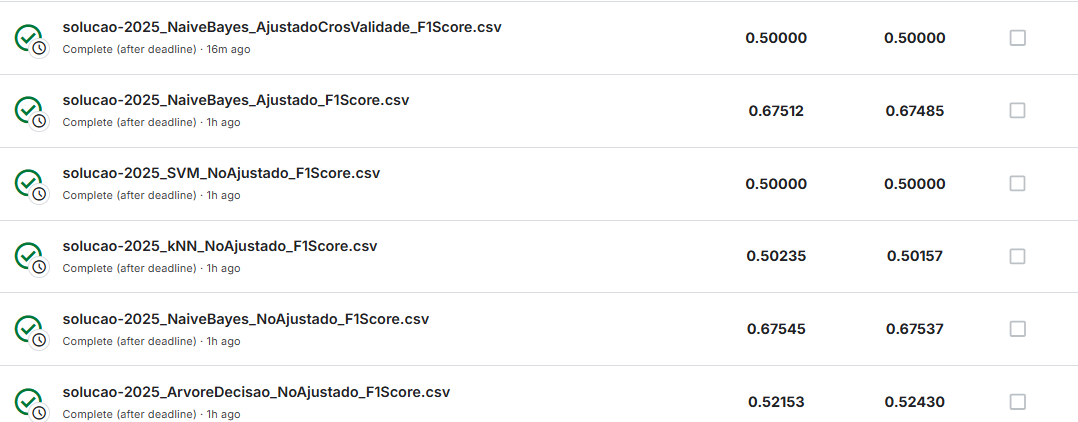

Consolidando os resultados de todas os F1 Macro encontrados chegou-se aos resultados mostrados na tabela abaixo

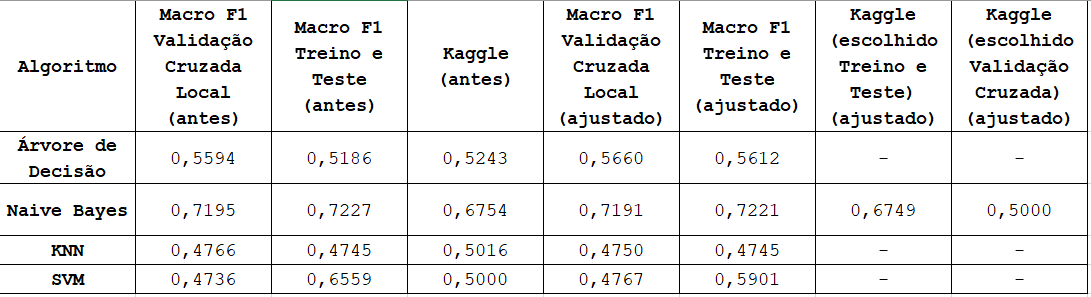

De um modo geral, a validação cruzada trouxe melhorias na predição dos modelos.A exceção fica a cargo do SVM que teve comportamento quase que aleatório. O melhor classificador em todos os testes foi o Naive Bayes, não sendo observado diferença significativa entre os testes com hiperparâmetros ajustados e não ajustados. Um diferença significativa aconteceu quando os dados preditos pelo Naive Bayes foram testados, após validação cruzada e ajustes, no Kaggle. O F1 macro foi de 0,50, sugerindo um overfiting do modelo.